In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load and explore data
column_names = ['label', 'text']
label_map = {'ham': 0, 'spam': 1}
train_dataset = pd.read_csv("train-data.tsv", sep='\t', names=column_names)
test_dataset = pd.read_csv("test-data.tsv", sep='\t', names=column_names)

print(train_dataset.shape)
print(test_dataset.shape)

(4179, 2)
(1392, 2)


       text
label      
ham    3619
spam    560


<AxesSubplot:ylabel='label'>

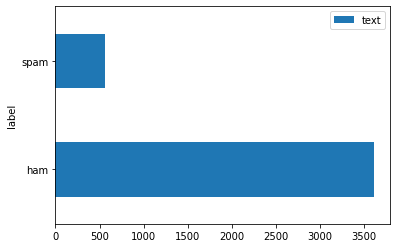

In [22]:
# Compare distribution of spam and ham texts
distribution_count = train_dataset.groupby('label').count()
print(distribution_count)

distribution_count.plot(kind='barh')

In [23]:
# Convert categorical label to numeric
train_dataset['label'] = train_dataset['label'].apply(label_map.get)
test_dataset['label'] = test_dataset['label'].apply(label_map.get)
train_dataset.head()

,label,text
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...


In [24]:
# Resample data
ham_texts = train_dataset[train_dataset['label'] == 0]
spam_texts = train_dataset[train_dataset['label'] == 1]

sampled_ham_texts = ham_texts.sample(len(spam_texts), random_state=44)

print(spam_texts.shape, sampled_ham_texts.shape)

# Merge resampled data
sampled_train_dataset = sampled_ham_texts.append(spam_texts).reset_index(drop=True)

(560, 2) (560, 2)


In [25]:
# Extract labels
train_labels = sampled_train_dataset.pop('label')
test_labels = test_dataset.pop('label')

train_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [26]:
# Convert text to numeric data
tokenizer = keras.preprocessing.text.Tokenizer(num_words = 500, 
                                               oov_token = "<OOV>")
tokenizer.fit_on_texts(sampled_train_dataset['text'])